# Stats sub-module

The ```acgc.stats``` sub-module is a collection of statistical methods. See ```help(acgc.stats)``` for complete list of methods.

The most commonly used functions include BivariateStatistics, line fitting methods (sma, sen, york), and weighted statistics (wmean, wmedian, wcov, wcorr, etc.).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from acgc import stats as mystats
from acgc import figstyle

## BivariateStatistics
This function quickly computes many statistical measures of the relationship between two populations.

As an example, we will create samples of two populations with a linear relationship between them, which is obscured by noise added to both 

In [2]:
# Generate two sample populations
n = 100
x_true = np.random.rand(n) + 2
y_true = 2*x_true + 1 

# Add noise with normal distribution
x = x_true + np.random.randn(n)*0.1
y = y_true + np.random.randn(n)*0.3

Use `BivariateStatistics` to compute statistical relationships and `summary()` to display some of the most commonly used statistics. 

In [3]:
# Compute bivariate statistics
result = mystats.BivariateStatistics(x,y)

# Display a table showing some common statistical measures of population differences
print(result.summary())

MD    = 3.4666
MAD   = 3.4666
RMD   = 1.4099
RMAD  = 1.4099
MRD   = 1.4222
R2    = 0.7586
slope = 2.0380
n     = 100



The abbreviations seen in the `summary()` output are defined in the documentation for the `result` variable.

In [4]:
# Show documentation including abbreviations
help(result)

Help on BivariateStatistics in module acgc.stats.bivariate object:

class BivariateStatistics(builtins.object)
 |  BivariateStatistics(x, y, w=None, dropna=False, data=None)
 |  
 |  A suite of common statistics to quantify bivariate relationships
 |  
 |  Class method 'summary' provides a formatted summary of these statistics
 |  
 |  Attributes
 |  ----------
 |  count, n : int
 |      number of data value pairs
 |  xmean, ymean : float
 |      mean of x and y variables
 |  xmedian, ymedian :float
 |      median of x and y variables
 |  xstd, ystd : float
 |      standard deviation of x and y variables
 |  mean_difference, md : float
 |      ymean - xmean
 |  mean_absolute_difference, mad : float
 |      mean( |y-x| )
 |  relative_mean_difference, rmd : float
 |      md / xmean
 |  relative_mean_absolute_difference, rmad :float
 |      mad / xmean
 |  standardized_mean_difference, smd : float
 |      md / xstd
 |  standardized_mean_absolute_difference, smad : float
 |      mad /xstd


Users can specify which variables they want to include in the summary output and the type of line fitting that they want to use (SMA, OLS, WLS, Theil-Sen, York)

In [5]:
# Specify exactly which variables to include in the summary
#   mean difference (MD)
#   Median difference (MedD)
#   slope (SMA method)
#   intercept (SMA method)
#   Pearson correlation (R)
display_vars = ['MD','MedD','slope','intercept','R','fitline']

# Summarize, using OLS line fitting
print(result.summary(display_vars, 
    fitline_kw={'method':'OLS'}))

MD        = 3.4666
MedD      = 3.4187
slope     = 1.7751
intercept = 1.5609
R         = 0.8710
y_OLS     = 1.7751 x + 1.5609



### Show a figure with summary statistics as an inset table

The summary table can be written on a figure. 

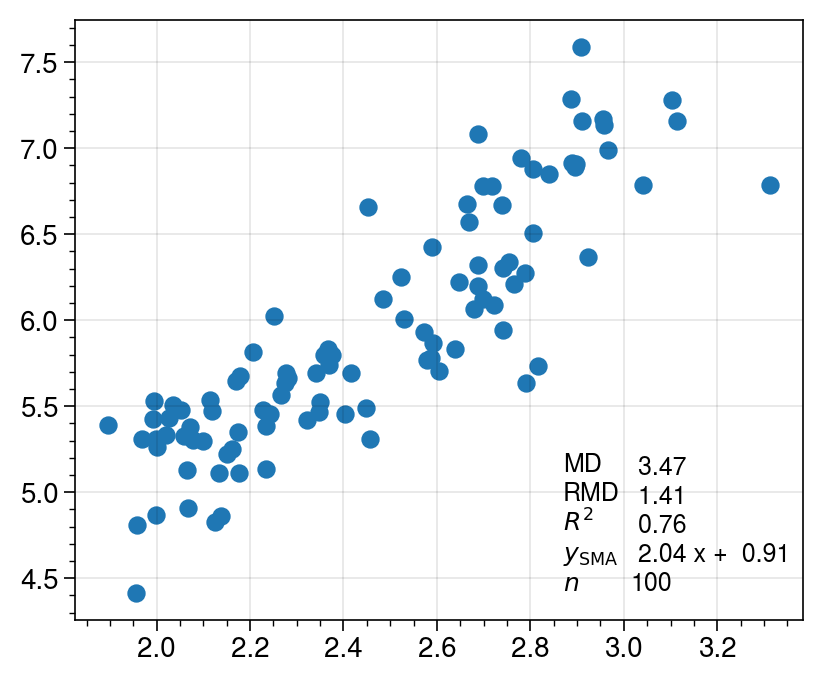

In [6]:
# Plot data
ax = plt.subplot()
ax.scatter(x,y)

# Add text displaying slope and R2
t=result.summary_fig_inset(ax,
                         ['MD','RMD','R2','fitline','n'],
                         floatformat='{:5.2f}',
                         loc=(0.67,0.05), loc_units='axes',
                         fontsize=9)

## Weighted statistics

Weighted versions of mean, standard deviation, covariance, etc. are available. The functions names follow the numpy functions prefixed with 'w'. For example 'wmean' is the weighted mean and 'wstd' is the weighted standard deviation. When weights are equal to 1, the result is identical to the unweighted statistic.

In [8]:
# Generate hypothetical weights. These should be positive
w = (np.random.randn(n)+1)**2

# Print some weighted statistics
print('Weighted mean:', mystats.wmean(x,w) )
print('Weighted std:',  mystats.wstd(x,w))
print('Weighted covariance:', mystats.wcov(x,y,w))
print('Standard covariance:', mystats.wcov(x,y,np.ones_like(x)))


Weighted mean: 2.4378853069023005
Weighted std: 0.34714801666886197
Weighted covariance: 0.1988834404801238
Standard covariance: 0.20361483997499788


With the `robust` keyword, the sample weights are computed internally to reduce the influence of extreme outliers. 

In [9]:
# Add some extreme outliers
xoutliers = x + np.random.standard_cauchy(n)

# The outliers affect the mean much more than the robust mean
print('Standard mean:', np.mean(xoutliers))
print('Robust mean:', mystats.wmean(xoutliers,robust=True))

Standard mean: 1.6492261908272627
Robust mean: 2.2437244302069717


/Users/cdholmes/anaconda3/envs/main/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
